<h1> We are going to use the Clean and Pre-processed Data </h1>

In [1]:
# Importing the Imp libraries for model making and analysis

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the dataset 
# Get the current working directory (cwd)
cwd = os.getcwd()   
# Get all the files in that directory
files = os.listdir(cwd) 
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\devan\\Workspace\\ClimateChange': ['.ipynb_checkpoints', 'ByCountryProj.ipynb', 'CitiesAnalysis.ipynb', 'Datasets', 'DataViz', 'EditedByCity.csv', 'Flow.txt', 'Global_project.ipynb', 'steamlit-app.py', 'Suggestion.txt']


In [3]:
data = pd.read_csv(f"EditedByCity.csv",delimiter=",")
data

,Date,AverageTemperature,confidence_interval_temp,City,Country,Latitude,Longitude,Year
0,1980-01-01,-1.850,0.363,Århus,Denmark,57.05N,10.33E,1980
1,1980-02-01,-2.171,0.377,Århus,Denmark,57.05N,10.33E,1980
2,1980-03-01,0.625,0.178,Århus,Denmark,57.05N,10.33E,1980
3,1980-04-01,6.151,0.203,Århus,Denmark,57.05N,10.33E,1980
4,1980-05-01,11.434,0.226,Århus,Denmark,57.05N,10.33E,1980
...,...,...,...,...,...,...,...,...
1418475,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,2013
1418476,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,2013
1418477,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,2013
1418478,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,2013


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418480 entries, 0 to 1418479
Data columns (total 8 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Date                      1418480 non-null  object 
 1   AverageTemperature        1418480 non-null  float64
 2   confidence_interval_temp  1418480 non-null  float64
 3   City                      1418480 non-null  object 
 4   Country                   1418480 non-null  object 
 5   Latitude                  1418480 non-null  object 
 6   Longitude                 1418480 non-null  object 
 7   Year                      1418480 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 86.6+ MB


In [5]:
delhi = data.loc[data['City'] == ('New Delhi' or "Delhi"), ['Date','AverageTemperature']]
delhi.columns = ['Date','Temp']

delhi['Date'] = pd.to_datetime(delhi['Date'])
delhi.reset_index(drop=True, inplace=True)
delhi.set_index('Date', inplace=True)
delhi

,Temp
Date,
1980-01-01,14.912
1980-02-01,19.007
1980-03-01,22.747
1980-04-01,30.976
1980-05-01,35.417
...,...
2013-04-01,29.304
2013-05-01,34.746
2013-06-01,33.066


In [6]:
delhi['Month'] = delhi.index.month
delhi['Year'] = delhi.index.year
delhi

,Temp,Month,Year
Date,,,
1980-01-01,14.912,1,1980
1980-02-01,19.007,2,1980
1980-03-01,22.747,3,1980
1980-04-01,30.976,4,1980
1980-05-01,35.417,5,1980
...,...,...,...
2013-04-01,29.304,4,2013
2013-05-01,34.746,5,2013
2013-06-01,33.066,6,2013


No handles with labels found to put in legend.


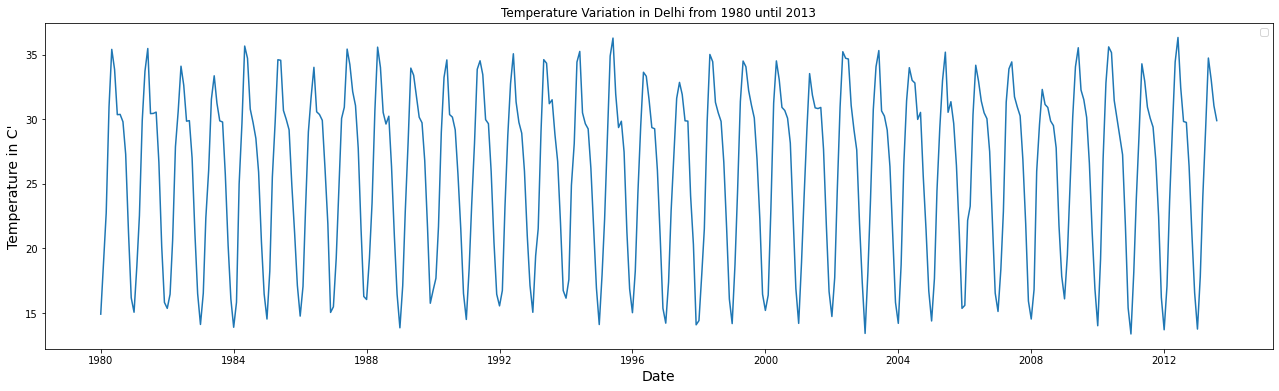

In [7]:
plt.figure(figsize=(22,6))
sns.lineplot(x=delhi.index, y=delhi['Temp'])
plt.title('Temperature Variation in Delhi from 1980 until 2013')
plt.xlabel("Date",fontsize=14)
plt.ylabel("Temperature in C'",fontsize=14)
plt.legend()
plt.savefig(f"./DataViz/Delhi/1980-2013Temp.jpeg")
plt.show()


In [8]:
# For better analysis and getting more insight on trends and pattern of temperature change in the New Delhi
# We will be creating a SpreadSheet/Pivot Table to map temperature change in each month 
pivot = pd.pivot_table(delhi, values='Temp', index='Month', columns='Year', aggfunc='mean')
pivot

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Month,,,,,,,,,,,,,,,,,,,,,
1,14.912,15.060,15.359,14.113,13.895,14.533,14.760,15.481,16.046,13.854,...,14.199,14.383,15.594,15.120,14.534,16.096,14.014,13.376,13.701,13.756
2,19.007,18.662,16.457,16.533,15.830,18.244,17.064,19.231,19.241,17.120,...,18.737,17.669,22.174,18.382,16.809,19.479,19.178,18.136,17.088,17.824
3,22.747,22.530,20.619,22.369,24.987,25.515,23.100,24.327,23.526,22.863,...,26.432,24.469,23.271,22.863,25.979,24.655,26.953,23.864,23.686,24.025
4,30.976,29.892,27.876,26.043,29.690,29.794,29.026,30.067,30.658,28.167,...,31.433,29.322,30.364,31.331,29.609,30.182,32.809,28.956,29.341,29.304
5,35.417,33.729,30.614,31.552,35.673,34.614,31.708,30.936,35.589,33.966,...,33.999,32.998,34.188,33.907,32.313,34.067,35.610,34.298,34.448,34.746
6,33.860,35.484,34.114,33.371,34.726,34.572,34.027,35.438,34.024,33.412,...,33.017,35.200,32.943,34.446,31.151,35.543,35.165,32.967,36.339,33.066
7,30.361,30.441,32.649,31.254,30.797,30.685,30.584,34.241,30.532,31.824,...,32.816,30.544,31.412,31.745,30.918,32.271,31.465,30.947,32.448,31.053
8,30.381,30.457,29.858,29.883,29.750,29.991,30.374,32.147,29.636,30.163,...,29.993,31.364,30.507,30.950,29.868,31.519,30.031,30.075,29.833,29.900
9,29.811,30.558,29.895,29.790,28.522,29.186,29.922,31.064,30.240,29.733,...,30.534,29.675,30.051,30.266,29.513,30.154,28.612,29.399,29.759,NaN


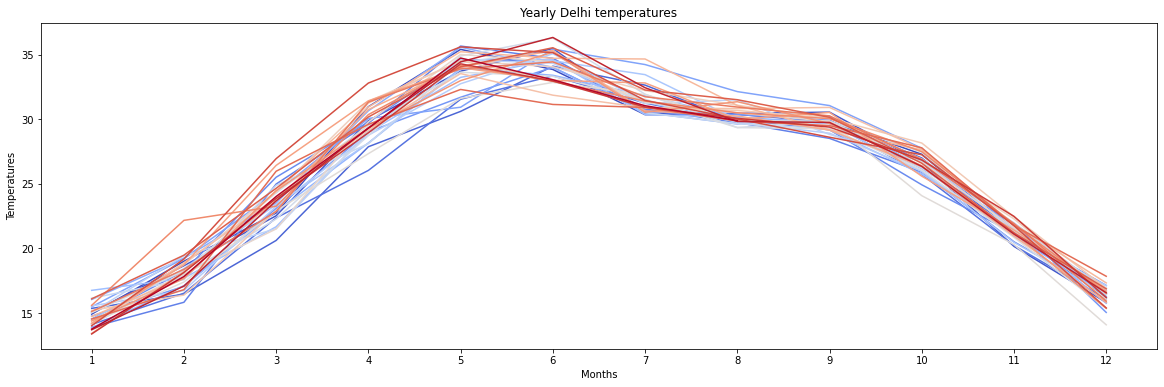

In [9]:

pivot.plot(figsize=(20,6), 
           colormap="coolwarm")
plt.title('Yearly Delhi temperatures')
plt.xlabel('Months')
plt.ylabel('Temperatures')

plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.savefig(f"./DataViz/Delhi/TemperatureChangeDelhi.png")
plt.show()


## It is clearly visible through the plot that their exist a Temperature rise in month of May, June and July and the temperature descent in month of November and December


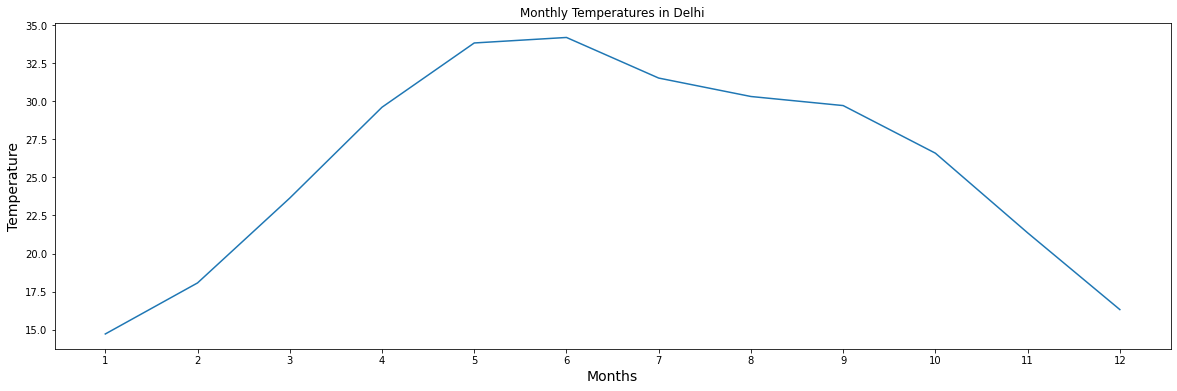

In [10]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Delhi')
plt.xlabel('Months',fontsize=14)
plt.ylabel('Temperature',fontsize=14)
plt.xticks([x for x in range(1,13)])
plt.savefig(f"./DataViz/Delhi/AvgTempChangeMonth.png")
plt.show()

## We can see some trends in the dataset. Let see it thru some Time Analysis Theory

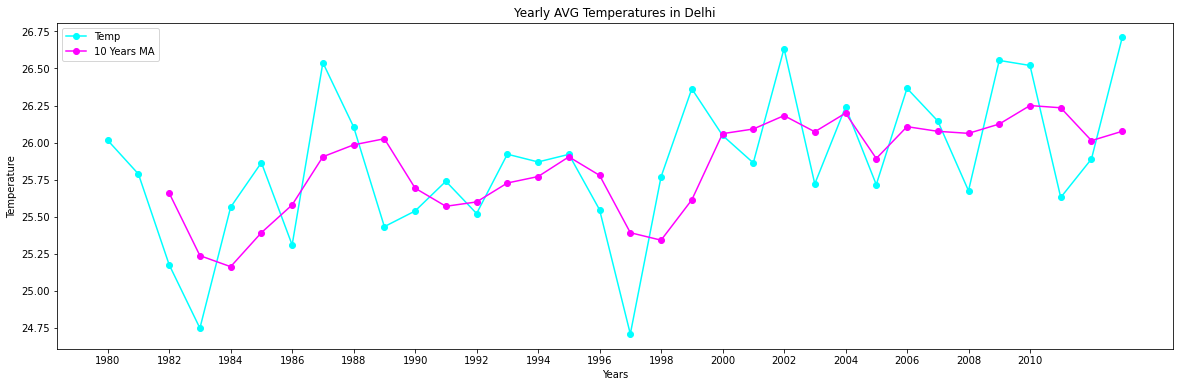

In [11]:

year_avg = pd.pivot_table(delhi, values='Temp', index='Year', aggfunc='mean')
# The rolling mean of Temp in last 10 years
# Rolling mean window is 3
year_avg['10 Years MA'] = year_avg['Temp'].rolling(3).mean()
year_avg[['Temp','10 Years MA']].plot(kind="line",
                                      figsize=(20,6),
                                      colormap="cool",
                                      marker='o',)

plt.title('Yearly AVG Temperatures in Delhi')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1980,2012,2)])

plt.savefig(f"./DataViz/Delhi/TempChangeVsRollingMean.png")
plt.show()

In [12]:
max(year_avg['Temp'])-min(year_avg['Temp'])

2.0010833333333338

# Therefore we can say that the Average Change in Temperature happened across 1980-2013 is 2.0010833333333338

# Now, Lets try to make a Machine Learning Model

In [13]:
# Before moving forward, lets first split the dataset into Training, Validation and Testing
# Now since its not any random sequence data therfore use of Random value and sample bias doesnt apply here
# We can simply split the data using simple slicing and cutting operation on DataFrame


In [14]:
# Train Size is 200
df_train = delhi[-300:]
# Val size is 100
df_val = delhi[200:300]
# Test Size is 100
df_test = delhi[:-200]

In [15]:
print("Training Dataset: ",len(df_train))
print("Validation Dataset: ",len(df_val))
print("Testing Dataset: ",len(df_test))

Training Dataset:  300
Validation Dataset:  100
Testing Dataset:  204


 <H2><p> ADCF Test: ADCF stands for Augmented Dickey-Fuller test which is a statistical unit root test. It gives us various values which can help us identifying stationarity.<br/>
     - It comprises Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. <br>
     - The Null hypothesis says that time series is non-stationary. THE ADCF test also gives us a p-value. According to the null hypothesis, lower values of p is better.<br></p></h2>

In [16]:
# No Null value
df_train.isnull().sum()

Temp     0
Month    0
Year     0
dtype: int64

In [17]:
from statsmodels.tsa.stattools import adfuller

print('Augmented Ducky Fuller Test Results')

test_data = adfuller(df_train.iloc[:,0].values,autolag='AIC')

data_output = pd.Series(test_data[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observation Used'])

for key,value in test_data[4].items():
    
    data_output['Critical value (%s)'%key] = value
    
print(data_output)

Augmented Ducky Fuller Test Results
Test Statistic                 -3.340807
p-value                         0.013150
Lags Used                      13.000000
Number of Observation Used    286.000000
Critical value (1%)            -3.453423
Critical value (5%)            -2.871699
Critical value (10%)           -2.572183
dtype: float64


<h2><p>
As test statistic has lesser value than critical values. So,we can say that time series is stationary.
</p></h2>

In [18]:
import math
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
       
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
   
    ax1.set_title('Delhi Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    plt.savefig(f"./DataViz/Delhi/AdfullerTest.png")
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                  -3.3408
p-value                          0.0132
Lags Used                       13.0000
Number of Observations Used    286.0000
Critical Value (1%)             -3.4534
Critical Value (5%)             -2.8717
Critical Value (10%)            -2.5722
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


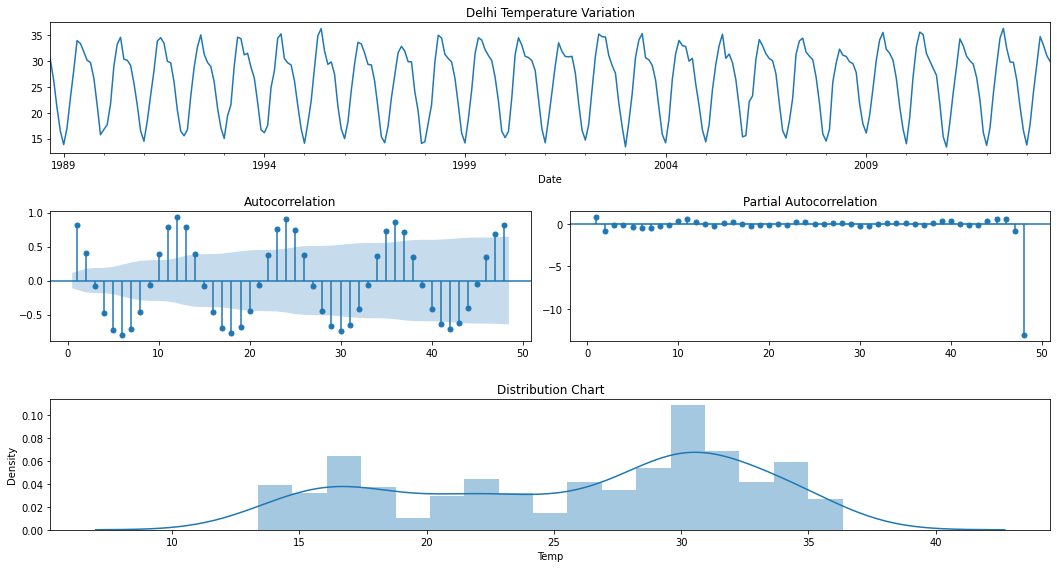

In [19]:
# The first approach is to check the series without any transformation
check_stationarity(df_train["Temp"])

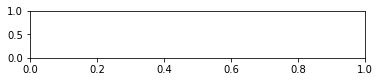

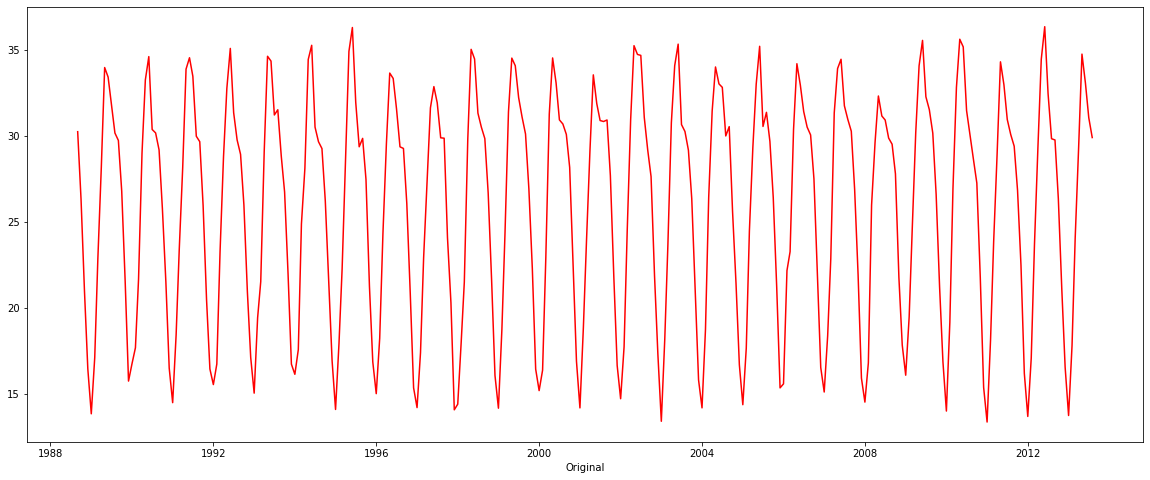

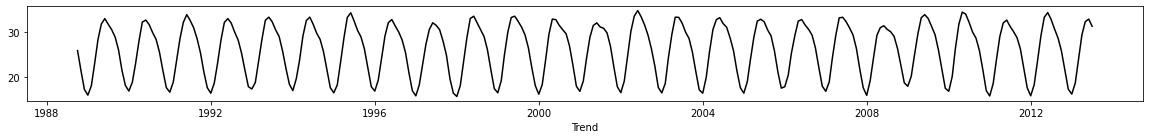

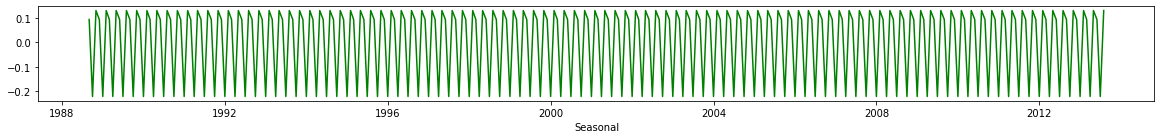

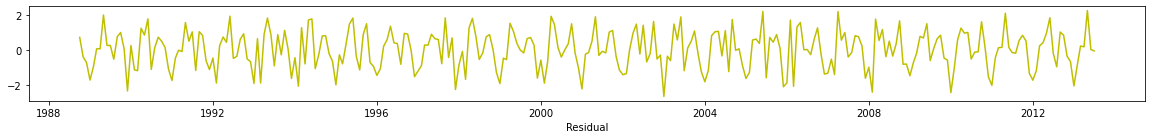

<Figure size 1440x576 with 0 Axes>

In [20]:
#Now we break the data into sub section
from statsmodels.tsa.seasonal import seasonal_decompose

decomp= seasonal_decompose(df_train["Temp"],period=3)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.figure(figsize=(20,8))
plt.plot(df_train["Temp"],'r-')
plt.xlabel('Original')
plt.figure(figsize=(20,8))

plt.subplot(412)
plt.plot(trend,'k-')
plt.xlabel('Trend')
plt.figure(figsize=(20,8))

plt.subplot(413)
plt.plot(seasonal,'g-')
plt.xlabel('Seasonal')
plt.figure(figsize=(20,8))

plt.subplot(414)
plt.plot(residual,'y-')
plt.xlabel('Residual')
plt.figure(figsize=(20,8))

plt.tight_layout()

Results of Dickey-Fuller Test:
Test Statistic                  -6.4568
p-value                          0.0000
Lags Used                       12.0000
Number of Observations Used    275.0000
Critical Value (1%)             -3.4544
Critical Value (5%)             -2.8721
Critical Value (10%)            -2.5724
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


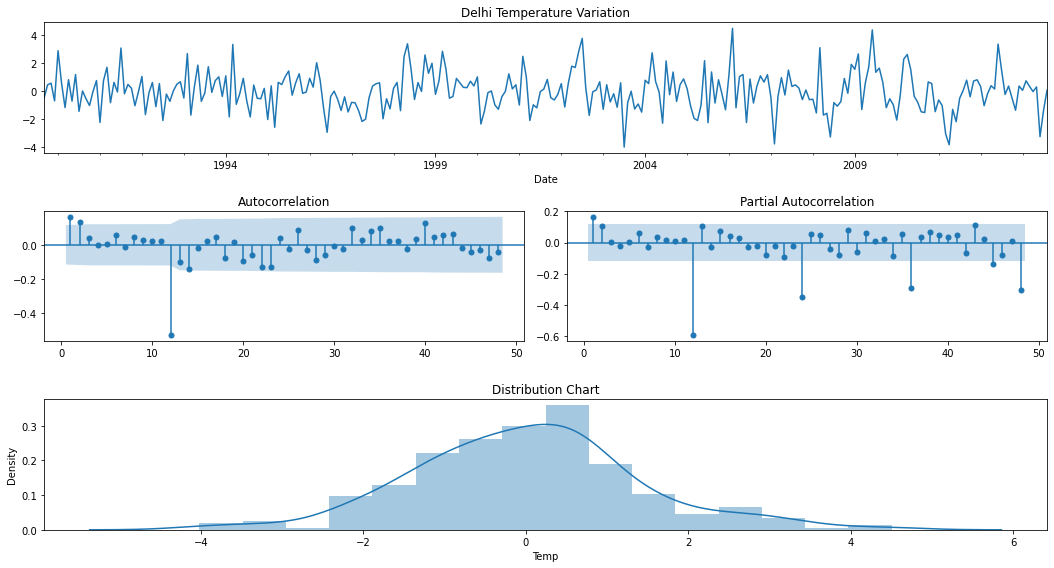

In [21]:
# Pandas dataframe.diff() is used to find the first discrete difference of objects over the given axis. We can provide a period value to shift for forming the difference.
check_stationarity(df_train['Temp'].diff(12).dropna())

<p><h3><font color="white">
<h1>What is SARIMA?</h1>
<br>
Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.
<br>
It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.
<br>
How to Configure SARIMA<br>
Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.
<br>
Trend Elements<br>
There are three trend elements that require configuration.
<br>
They are the same as the ARIMA model; specifically:
<br>
p: Trend autoregression order.<br>
d: Trend difference order.<br>
q: Trend moving average order.<br>
<br>
Seasonal Elements<br>
There are four seasonal elements that are not part of ARIMA that must be configured; they are:
<br>
P: Seasonal autoregressive order.<br>
D: Seasonal difference order.<br>
Q: Seasonal moving average order.<br>
m: The number of time steps for a single seasonal period.<br>
Together, the notation for an SARIMA model is specified as:<br>
<br>
SARIMA(p,d,q)(P,D,Q)m<br>

SARIMA(p,d,q)(P,D,Q)m<br>
Where the specifically chosen hyperparameters for a model are specified; for example:<br>
<br>
SARIMA(3,1,0)(1,1,0)12<br>

SARIMA(3,1,0)(1,1,0)12<br>
Importantly, the m parameter influences the P, D, and Q parameters. For example, an m of 12 for monthly data suggests a yearly seasonal cycle.<br>

A P=1 would make use of the first seasonally offset observation in the model, e.g. t-(m*1) or t-12. A P=2, would use the last two seasonally offset observations t-(m * 1), t-(m * 2).<br>

Similarly, a D of 1 would calculate a first order seasonal difference and a Q=1 would use a first order errors in the model (e.g. moving average).<br>

</font></h3></p>

In [22]:
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

In [23]:
# Let's test it in the validation set
df_val['Pred'] = walk_forward(df_train['Temp'], df_val['Temp'], ((3,0,0),(0,1,1,12),'c'))

In [24]:
# Measuring the error of the prediction
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

rmse_pred = measure_rmse(df_val['Temp'], df_val['Pred'])

print(f"The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)} celsius degrees")
#print(f"It's a decrease of {round((rmse_pred/rmse_base-1)*100,2)}% in the RMSE")

The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was 0.9701 celsius degrees


In [25]:
# Creating the error column
df_val['Error'] = df_val['Temp'] - df_val['Pred']
df_val

,Temp,Month,Year,Pred,Error
Date,,,,,
1996-09-01,29.268,9,1996,29.682843,-0.414843
1996-10-01,26.075,10,1996,26.787649,-0.712649
1996-11-01,20.857,11,1996,21.519843,-0.662843
1996-12-01,15.364,12,1996,16.281375,-0.917375
1997-01-01,14.214,1,1997,14.262078,-0.048078
...,...,...,...,...,...
2004-08-01,29.993,8,2004,30.833111,-0.840111
2004-09-01,30.534,9,2004,29.772547,0.761453
2004-10-01,25.600,10,2004,27.041006,-1.441006


In [26]:
def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [27]:
df_val.drop(['Month','Year'], axis=1, inplace=True)


In [28]:
df_val

,Temp,Pred,Error
Date,,,
1996-09-01,29.268,29.682843,-0.414843
1996-10-01,26.075,26.787649,-0.712649
1996-11-01,20.857,21.519843,-0.662843
1996-12-01,15.364,16.281375,-0.917375
1997-01-01,14.214,14.262078,-0.048078
...,...,...,...
2004-08-01,29.993,30.833111,-0.840111
2004-09-01,30.534,29.772547,0.761453
2004-10-01,25.600,27.041006,-1.441006


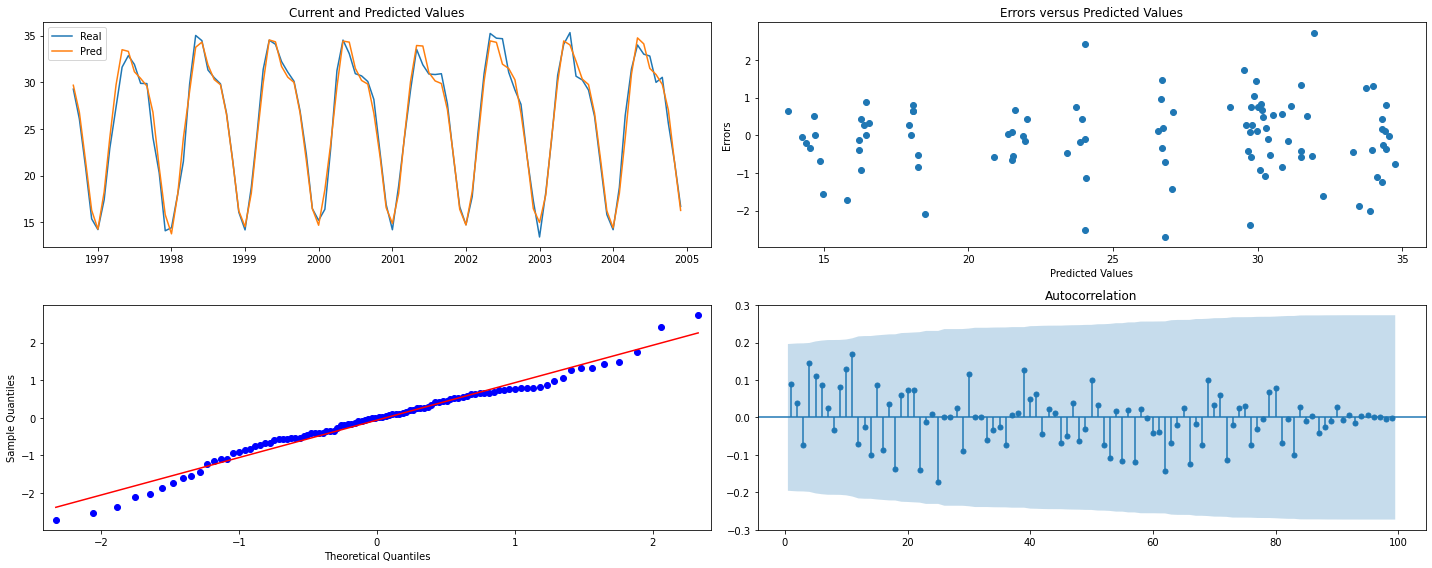

In [29]:
plot_error(df_val)

In [30]:
#Creating the new concatenating the training and validation set:

future = pd.concat([df_train['Temp'], df_val['Temp']])
future

Date
1988-09-01    30.240
1988-10-01    26.342
1988-11-01    20.976
1988-12-01    16.458
1989-01-01    13.854
               ...  
2004-08-01    29.993
2004-09-01    30.534
2004-10-01    25.600
2004-11-01    21.422
2004-12-01    16.697
Name: Temp, Length: 400, dtype: float64

In [31]:
# Using the same parameters of the fitted model

model = sm.tsa.statespace.SARIMAX(future, order=(3,0,0), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)


<font color="red"><h2> Error Spotted :: Prediction is giving NaN Values </h2></font>

In [32]:
df_test['Pred'] = result.predict(start=1, end=len(df_test))
df_test[df_test.isna().any(axis=1)]


,Temp,Month,Year,Pred
Date,,,,
1980-01-01,14.912,1,1980,NaN
1980-02-01,19.007,2,1980,NaN
1980-03-01,22.747,3,1980,NaN
1980-04-01,30.976,4,1980,NaN
1980-05-01,35.417,5,1980,NaN
...,...,...,...,...
1988-05-01,35.589,5,1988,NaN
1988-06-01,34.024,6,1988,NaN
1988-07-01,30.532,7,1988,NaN


In [33]:
df_test_plot=df_test.dropna(how='any' ,axis=0)
df_test_plot

,Temp,Month,Year,Pred
Date,,,,
1988-10-01,26.342,10,1988,0.012046
1988-11-01,20.976,11,1988,0.012052
1988-12-01,16.458,12,1988,0.012050
1989-01-01,13.854,1,1989,0.012047
1989-02-01,17.120,2,1989,0.012044
...,...,...,...,...
1996-08-01,29.360,8,1996,30.072020
1996-09-01,29.268,9,1996,29.317990
1996-10-01,26.075,10,1996,26.363882


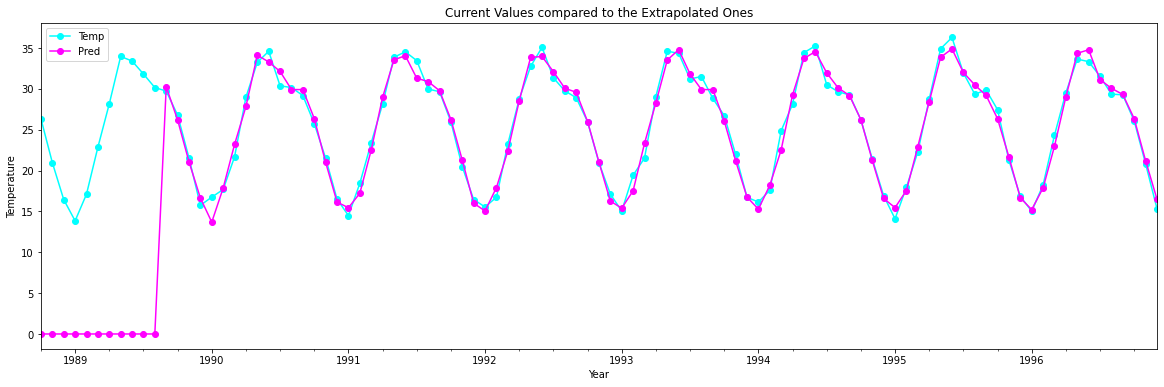

In [34]:
df_test_plot[['Temp', 'Pred']].plot(kind="line",
                                      figsize=(20,6),
                                      colormap="cool",
                                      marker='o',)

plt.title('Current Values compared to the Extrapolated Ones')

plt.xlabel('Year')
plt.ylabel('Temperature')

plt.savefig(f"./DataViz/Delhi/ModelPrediction.png")
plt.show()

In [35]:
df_test_plot['Error']=df_test_plot['Temp']- df_test_plot['Pred']
df_test_plot

,Temp,Month,Year,Pred,Error
Date,,,,,
1988-10-01,26.342,10,1988,0.012046,26.329954
1988-11-01,20.976,11,1988,0.012052,20.963948
1988-12-01,16.458,12,1988,0.012050,16.445950
1989-01-01,13.854,1,1989,0.012047,13.841953
1989-02-01,17.120,2,1989,0.012044,17.107956
...,...,...,...,...,...
1996-08-01,29.360,8,1996,30.072020,-0.712020
1996-09-01,29.268,9,1996,29.317990,-0.049990
1996-10-01,26.075,10,1996,26.363882,-0.288882


In [36]:
df_test_plot.drop(['Month','Year'], axis=1, inplace=True)


In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Temp   No. Observations:                  400
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -547.365
Date:                              Sat, 13 Nov 2021   AIC                           1106.730
Time:                                      21:00:19   BIC                           1130.496
Sample:                                           0   HQIC                          1116.153
                                              - 400                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.006      1.345      0.179      -0.004       0.020
ar.L1          0.2690      0.053      5.113      0.000       0.166       0.372
ar.L2          0.0552      0.053      1.046      0.296      -0.048       0.159
ar.L3         -0.0147      0.052     -0.283      0.777      -0.116       0.087
ma.S.L12      -0.9341      0.037    -25.365      0.000      -1.006      -0.862
sigma2         0.9231      0.056     16.489      0.000       0.813       1.033
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.46
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.26
Prob(H) (two-sided):                  0.88   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
fc= result.forecast(len(df_test), alpha=0.05) 
fc 

400    14.660771
401    18.333289
402    24.115500
403    30.239328
404    34.248855
         ...    
599    30.768660
600    30.131617
601    27.015899
602    21.876683
603    16.651998
Name: predicted_mean, Length: 204, dtype: float64

In [39]:
from statsmodels.tsa.stattools import acf
#  Accuracy metrics

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-df_test['Temp'])[1]                      # ACF1
    #return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'acf1':acf1,'corr':corr, 'minmax':minmax})
    
    return({'corr':corr,
            'minmax':minmax})

forecast_accuracy(fc, df_test['Temp'])

{'corr': 0.9872658998302797, 'minmax': 0.03537159554744573}

In [1]:
fc

NameError: name 'fc' is not defined

In [ ]:
temp=df_test['Temp'].values
temp

array([14.912, 19.007, 22.747, 30.976, 35.417, 33.86 , 30.361, 30.381,
       29.811, 27.294, 21.246, 16.175, 15.06 , 18.662, 22.53 , 29.892,
       33.729, 35.484, 30.441, 30.457, 30.558, 26.662, 20.158, 15.819,
       15.359, 16.457, 20.619, 27.876, 30.614, 34.114, 32.649, 29.858,
       29.895, 27.007, 21.164, 16.495, 14.113, 16.533, 22.369, 26.043,
       31.552, 33.371, 31.254, 29.883, 29.79 , 25.739, 20.228, 16.093,
       13.895, 15.83 , 24.987, 29.69 , 35.673, 34.726, 30.797, 29.75 ,
       28.522, 25.915, 20.514, 16.47 , 14.533, 18.244, 25.515, 29.794,
       34.614, 34.572, 30.685, 29.991, 29.186, 24.931, 21.174, 17.136,
       14.76 , 17.064, 23.1  , 29.026, 31.708, 34.027, 30.584, 30.374,
       29.922, 26.181, 21.918, 15.045, 15.481, 19.231, 24.327, 30.067,
       30.936, 35.438, 34.241, 32.147, 31.064, 27.76 , 21.494, 16.282,
       16.046, 19.241, 23.526, 30.658, 35.589, 34.024, 30.532, 29.636,
       30.24 , 26.342, 20.976, 16.458, 13.854, 17.12 , 22.863, 28.167,
      

In [ ]:
    fc_values=fc['predicted_mean'].values
    fc_values

array([14.66077109, 18.33328877, 24.11549956, 30.23932788, 34.2488547 ,
       34.07717526, 31.91514144, 30.576202  , 29.93913901, 26.82341567,
       21.68419738, 16.45951264, 14.60172864, 18.30875963, 24.11743009,
       30.24766526, 34.2598701 , 34.08887682, 31.92708146, 30.58820479,
       29.95116179, 26.8354438 , 21.69622713, 16.47154282, 14.61375896,
       18.32078998, 24.12946045, 30.25969562, 34.27190046, 34.10090718,
       31.93911182, 30.60023515, 29.96319215, 26.84747416, 21.70825749,
       16.48357318, 14.62578932, 18.33282034, 24.14149081, 30.27172598,
       34.28393082, 34.11293754, 31.95114218, 30.61226551, 29.97522251,
       26.85950452, 21.72028785, 16.49560355, 14.63781968, 18.3448507 ,
       24.15352117, 30.28375634, 34.29596119, 34.1249679 , 31.96317255,
       30.62429587, 29.98725287, 26.87153488, 21.73231821, 16.50763391,
       14.64985004, 18.35688107, 24.16555153, 30.2957867 , 34.30799155,
       34.13699826, 31.97520291, 30.63632623, 29.99928323, 26.88

In [ ]:
mape = np.mean(np.abs(fc_values - temp)/np.abs(temp))
mape

0.03718676685707314

In [ ]:
mape = np.mean(np.abs(fc_values - temp)/np.abs(temp))  
print('mape',mape)
me = np.mean(fc_values - temp)             # ME
print('me',me)
mae = np.mean(np.abs(fc_values - temp))    # MAE
print('mae',mae)

mpe = np.mean((fc_values - temp)/temp)   # MPE
print('mpe',mpe)
rmse = np.mean((fc_values - temp)**2)**.5  # RMSE
print('rmse',rmse)
corr = np.corrcoef(fc_values, temp)[0,1]   # corr
print('corr',corr)
mins = np.amin(np.hstack([fc_values[:,None],temp[:,None]]), axis=1)

maxs = np.amax(np.hstack([fc_values[:,None], temp[:,None]]), axis=1)

minmax = 1 - np.mean(mins/maxs)
print('minmax',minmax)

mape 0.03718676685707314
me 0.4938339317596095
mae 0.9060698723960969
mpe 0.02044744461482064
rmse 1.1644162580353816
corr 0.9872658998302797
minmax 0.03537159554744573
